Consider the three documents and classify them into suitable classes through the proper NLP process and provide Interpretation for all questions:<br>
Document 1:<br>
Mango is a sweet and delicious fruit rich in fiber with many benefits. Mangoes are said to possess many antioxidant properties, which is good for health.<br>
Document 2:<br>
Flexibility is improved by yoga. Yoga has several benefits. Regular practice of yoga improves muscle strength and posture. Yoga keeps the body healthy and fit.<br>
Document 3:<br>
Eating bananas will benefit you in different ways. Eat them raw or mixed in your favourite smoothie. To keep the body fit and healthy, eat bananas. Banana is fiber rich.<br>
1. Normalise the text to create tokens using suitable preprocessing. Remove stopwords and other undesired content.
2. Perform Stemming and Lemmatisation.
3. Create a BoW of normalised text. Generate word cloud of BoW.
4. Calculate the Term Frequency and TFIDF of the documents. Show the calculation ofTFIDF of the term “health”.
5. Plot the Term Frequencies.
6. Assume the class for each document. Apply Classification and Clustering.

PREPROCESSING

 Preprocessing the input text by performing the following steps:<br>
    1. Expand contractions<br>
    2. Remove URLs and emails<br>
    3. Remove special characters and emojis<br>
    4. Tokenization<br>
    5. Lowercasing<br>
    6. Remove punctuation<br>
    7. Remove stop words<br>
    8. Apply stemming<br>
    9. Apply lemmatization<br>


In [46]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

documents = [
    "Mango is a sweet and delicious fruit rich in fiber with many benefits. Mangoes are said to possess many antioxidant properties, which is good for health.",
    "Flexibility is improved by yoga. Yoga has several benefits. Regular practice of yoga improves muscle strength and posture. Yoga keeps the body healthy and fit.",
    "Eating bananas will benefit you in different ways. Eat them raw or mixed in your favourite smoothie. To keep the body fit and healthy, eat bananas. Banana is fiber rich."
]

def preprocess(doc):
    doc = doc.lower()
    doc = doc.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(doc)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens


tokenized_docs = [preprocess(doc) for doc in documents]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\satch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\satch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


STEMMING and LEMMATIZATION

In [47]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stemmed_docs = [[stemmer.stem(word) for word in doc] for doc in tokenized_docs]


In [48]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lemmatized_docs = [[lemmatizer.lemmatize(word) for word in doc] for doc in tokenized_docs]


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\satch\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


BAG OF WORDS and WORD CLOUD

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform([' '.join(doc) for doc in tokenized_docs])

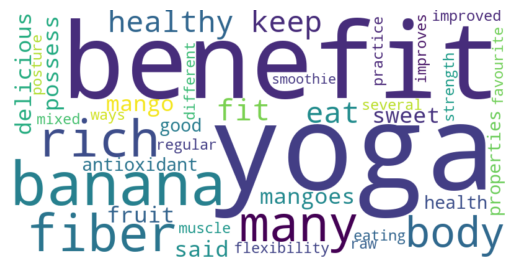

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([word for doc in tokenized_docs for word in doc]))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


TF and TF-IDF and Health word

In [76]:
import numpy as np
import pandas as pd

def compute_tf(term, doc):
    return doc.count(term) / len(doc)

tf_values = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform([' '.join(doc) for doc in tokenized_docs])

In [78]:
# TF-IDF Values for 'health'
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_health_values = tfidf_df['health']
print(tfidf_health_values)

0    0.280219
1    0.000000
2    0.000000
Name: health, dtype: float64


PLOTTING FREQUENCIES

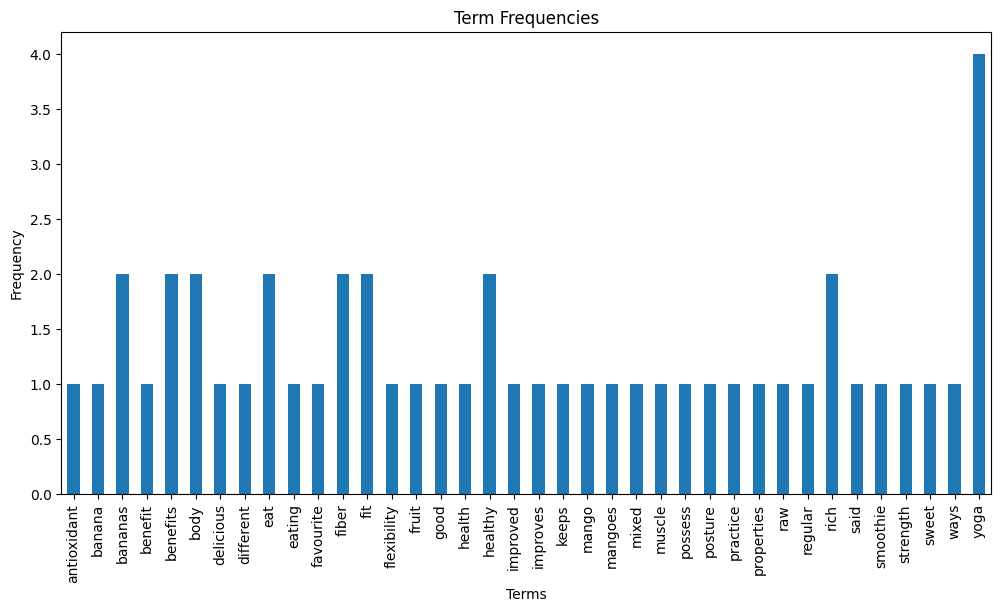

In [68]:
import matplotlib.pyplot as plt

term_freq = tf_values.sum(axis=0)
plt.figure(figsize=(12, 6))
term_freq.plot(kind='bar')
plt.title('Term Frequencies')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.show()


CLASSIFICATION

In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
# Train a Multinomial Naive Bayes classifier
labels = ['Fruit', 'Yoga', 'Fruit']
clf = MultinomialNB()
clf.fit(tfidf_matrix, labels)

# Predict using the trained classifier
predictions = clf.predict(tfidf_matrix)

# Print predictions and evaluate
print("Classification Predictions:")
for doc, label, pred in zip(documents, labels, predictions):
    print(f"Document: {doc[:50]}...\nActual Label: {label}, Predicted Label: {pred}\n")

print("Classification Report:")
print(classification_report(labels, predictions))
print(f"Accuracy: {accuracy_score(labels, predictions)}\n")


Classification Predictions:
Document: Mango is a sweet and delicious fruit rich in fiber...
Actual Label: Fruit, Predicted Label: Fruit

Document: Flexibility is improved by yoga. Yoga has several ...
Actual Label: Yoga, Predicted Label: Yoga

Document: Eating bananas will benefit you in different ways....
Actual Label: Fruit, Predicted Label: Fruit

Classification Report:
              precision    recall  f1-score   support

       Fruit       1.00      1.00      1.00         2
        Yoga       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Accuracy: 1.0



CLUSTERING

In [71]:
from sklearn.cluster import KMeans

num_clusters = 2  # Based on assumed classes
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(tfidf_matrix)
clusters = kmeans.labels_

print("Predicted Clusters: ",clusters)


Predicted Clusters:  [1 0 1]
